## Curved edges

It doesn't appear that toyplot has the functionality to do radial curvature of edges. I need to dive into the actual SVG code that it writes to check...

https://developer.mozilla.org/en-US/docs/Web/SVG/Tutorial/Paths

Can it be done using toyplot ellipses?

In [1]:
import numpy as np
import toyplot
#import toytree
import toyplot.svg
from IPython.display import SVG

### Primer
- M: move to. Moves cursor to this position.
- L: line to. Draws line from cursor to this position.
- C: Bezier curves (x1 y1, x2 y2, x y): 
- Q: Quadratic curve (x1 y1, x y):
- A: Arc (rx ry x-axis-rotation large-arc-flag sweep-flag x y)

### SEQVIEW ALIGN

- to get overflow it needs to be set on a div or maybe g element not on the svg.

In [63]:
%%HTML

<svg viewBox="0 0 100 20" xmlns="http://www.w3.org/2000/svg" overflow="auto" stroke="red">
  <text x="15" y="23"> This text is wider than the SVG, so there should be a scrollbar shown.</text>
</svg>


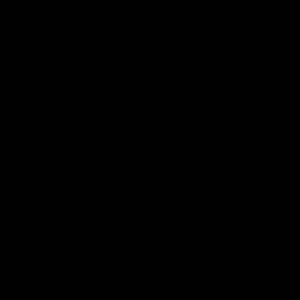

In [48]:
%%SVG

<svg width='300' height='300' viewBox="0 0 10 10">
  <rect width="10" height="10">
    <animate attributeName="rx" values="0;10;0" dur="1s" repeatCount="indefinite" />
  </rect>
</svg>

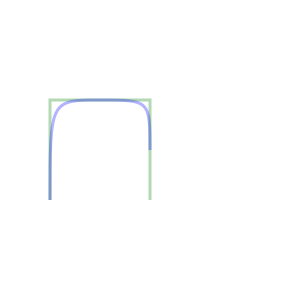

In [3]:
%%SVG 

<svg width="300" height="300" >
  <g class="general" stroke="green" stroke-width="3" fill="none">
      <path d="M 100 100 L 150 100 L 150 200" stroke-opacity="0.3"/>   
      <path d="M 100 100 L 50 100 L 50 200" stroke-opacity="0.3"/>
        
      <path d="M 100 100 C 150 100, 150 100, 150 150" stroke='blue' stroke-opacity='0.3'/>
      <path d="M 100 100 C 50 100, 50 100, 50 200" stroke='blue' stroke-opacity='0.3'/>

  </g>
</svg>

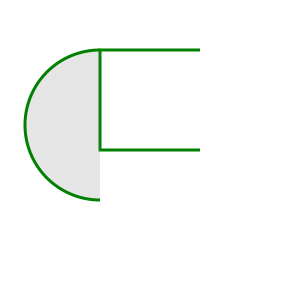

In [4]:
%%SVG 

<svg width="300" height="300" >
  <g class="general" stroke="green" stroke-width="3" fill="none">
      <path d="M 100 100 L 100 50 L 200 50 "/>
      <path d="M 100 100 L 100 150 L 200 150"/>
      <path d="M 100 50 A 50 50, 0, 0, 0, 100 200" fill='grey' fill-opacity="0.2"/>
  </g>
</svg>

### GOAL FOR CIRLCE LAYOUT

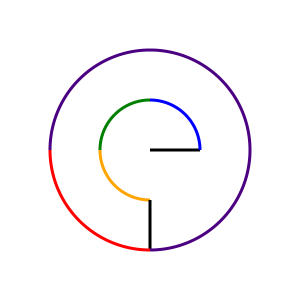

In [5]:
%%SVG 

<svg width="300" height="300" >
  <g class="general" stroke="green" stroke-width="3" fill="none">
      <path d="M 150 150 L 200 150" stroke="black"/>
      <path d="M 200 150 A 50 50, 0, 0, 0, 150 100" stroke="blue"/>
      <path d="M 150 100 A 50 50, 0, 0, 0, 100 150" stroke="green"/>
      <path d="M 100 150 A 50 50, 0, 0, 0, 150 200" stroke="orange"/>
      <path d="M 150 200 L 150 250" stroke="black"/>
      <path d="M 150 250 A 100 100, 0, 0, 1, 50 150" stroke="red" />
      <path d="M 50 150 A 100 100, 0, 0, 1, 150 50" stroke="indigo" />
      <path d="M 150 50 A 100 100, 0, 0, 1, 150 250" stroke="indigo" />
  </g>
</svg>

In [9]:
125 + 100, 175 + 100

(225, 275)

In [10]:
100 + 100, 150 + 50

(200, 200)

In [11]:
100 - 150, 100 - 50

(-50, 50)

In [12]:
125 - 175, 100 - 100

(-50, 0)

In [14]:
50 - 225, 100 - 100
175 / 2.

87.5

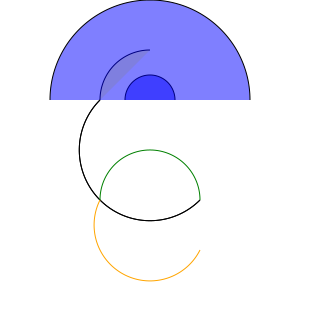

In [38]:
x = """
<svg width="320" height="320" xmlns="http://www.w3.org/2000/svg">
   <path d=" M100 100 A 50 50 0 0 1 150 50" fill="yellow" fill-opacity='0.25' stroke='black'/>
   <path d=" M125 100 A 25 25 0 0 1 175 100" fill='blue' fill-opacity='0.5' stroke='black' />
   <path d=" M50 100 A 87 87 0 0 1 250 100" fill='blue' fill-opacity='0.5' stroke='black' />
   
   
   <path d=" M 200 200 A 50 50 0 0 1 100 100 " fill="none" stroke="black" />
   <path d=" M 100 100 A 50 50 0 0 0 200 200 " fill="none" stroke="black" />

   <path d=" M 100 200 A 50 50 0 0 0 200 250 " fill="none" stroke="orange" />

   <path d=" M 200 200 A 50 50 0 0 0 100 200 " fill="none" stroke="green" />


</svg>
"""

from IPython.display import SVG
SVG(x)

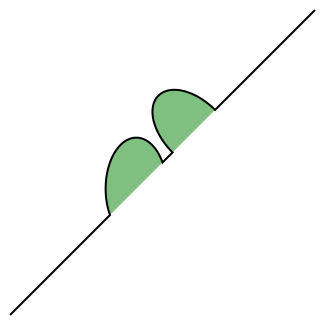

In [1]:
%%SVG

<svg width="320" height="320" xmlns="http://www.w3.org/2000/svg">
  <path d="M 10 315
           L 110 215
           A 30 50 0 0 1 162.55 162.45
           L 172.55 152.45
           A 30 50 -45 0 1 215.1 109.9
           L 315 10" stroke="black" fill="green" stroke-width="2" fill-opacity="0.5"/>
</svg>

### GOAL FOR PIE CHARTS

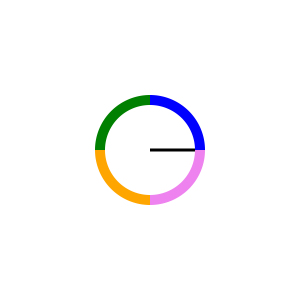

In [71]:
%%SVG 

<svg width="300" height="300" >
  <g class="general" stroke="green" stroke-width="3" fill="none">
      <path d="M 150 150 L 200 150" stroke="black"/>
      
      <path d="M 200 150 A 50 50, 0, 0, 0, 150 100" stroke="blue" stroke-width='10'/>
      <path d="M 150 100 A 50 50, 0, 0, 0, 100 150" stroke="green" stroke-width='10'/>
      <path d="M 100 150 A 50 50, 0, 0, 0, 150 200" stroke="orange" stroke-width='10'/>
      <path d="M 150 200 A 50 50, 0, 0, 0, 200 150" stroke="violet" stroke-width='10'/>
  </g>
</svg>


In [7]:
#SVG(x)

### Plan

1. Edges Class can be used to return ecoordinates and eshapes. Here I will set MA as opposed to MQ to indicate the use of SVG arc elements.   


2. toyplot.mark seems to be where the MA info is expanded to make a path d="..." element. For curved edges this must incorporate the 'curvature' argument somehow, but maybe not, since it does not seem to work currently.   


3. Like 'curvature', my Edge class should be able to build A elements from a single argument, origin, or alternatively, an x, y coordinate of the origin. From this it only needs to calculate the rx and ry (radius) and the sweep. 

### Curved edges
Currently the only option is curved edges, which uses bezier curves. This won't work, we need to use arcs. 

In [18]:
verts = np.array([(0, 0), (1, 0), (-1, 0)])
edges = np.array([(0, 1), (1, 2)])

In [19]:
# set up the canvas
c = toyplot.Canvas(width=400, height=300);
a = c.cartesian()

# add straight edges
a.graph(
    np.array([(0, 1)]),
    vcoordinates=[(0, 0), (1, 0)],
    vlshow=False,
);

# add curved edges
a.graph(
    np.array([(0, 1)]),
    vcoordinates=[(1, 0), (-1, 0)],
    layout=toyplot.layout.IgnoreVertices(
        edges=ArcsEdges((0, 0))),
    vlshow=False,
);

ValueError: Unknown edge shape segment: A

<svg class="toyplot-canvas-Canvas" height="300.0px" id="t9ba69b0dd62041519639893e05d9bb91" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 400.0 300.0" width="400.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> 0.0 0.5 1.0 -0.5 0.0 0.5

### Create an ArcEdges class similar to CurvedEdges
It takes an origin argument from which the radius can always be calculated, and it will also determine the sweep-flag automatically. 

In [20]:
??toyplot.mark

In [11]:
import numpy

class ArcsEdges(toyplot.layout.EdgeLayout):
    """Creates curved edges as arcs on a circle.
    
    Parameters
    ----------
    origin: tuple
        The origin is the x,y coordinates of the circle center.
    """
    def __init__(self, origin):
        self._origin = origin 
        
    def edges(self, vcoordinates, edges):
        
        # check for loops
        loops = edges.T[0] == edges.T[1]
        if numpy.any(loops):
            toyplot.log.warning(
                "Graph contains %s loop edges that will not be visible.", 
                numpy.count_nonzero(loops))            
            
        # M will map start coords, A will map arc shape
        eshapes = numpy.tile("MA", len(edges))
        ecoordinates = numpy.empty((len(edges) * 3, 2))

        # store start and end points
        sources = vcoordinates[edges.T[0]]
        targets = vcoordinates[edges.T[1]]
        
        # calculate midpoints of arcs (TODO)       
        offsets = numpy.dot(targets - sources, [[0, 1], [-1, 0]]) * self._origin[0]
        midpoints = ((sources + targets) * 0.5) + offsets

        ecoordinates[0::3] = sources
        ecoordinates[1::3] = midpoints
        ecoordinates[2::3] = targets

        return eshapes, ecoordinates
    
    
    def get_path(self):
        """
        The sweep-flag determines if the arc should begin moving 
        at positive angles or negative angles.
        """
        
        # orientation depends on x-axis (no rotation)
        sweep = 0
        if y1 - y0:
            sweep = 1
        
        # the svg path string expanded
        path = "M {x0} {y0} A {rx} {ry}, 0, 0, {sweep}, {x1, y1}"
        path = path.format(**cdict)
        
        return path
        

### Parse SVG with lxml

In [12]:
toyplot.svg.render(c, "test.svg")
svg = toyplot.svg.render(c)
html = toyplot.html.render(c, "test.html")

In [13]:
import xml.etree.ElementTree as ET
svg

<Element 'svg' at 0x7ffa134174f8>

In [14]:
svg.tag, svg.attrib

('svg',
 {'class': 'toyplot-canvas-Canvas',
  'xmlns:toyplot': 'http://www.sandia.gov/toyplot',
  'xmlns:xlink': 'http://www.w3.org/1999/xlink',
  'xmlns': 'http://www.w3.org/2000/svg',
  'width': '400.0px',
  'height': '300.0px',
  'viewBox': '0 0 400.0 300.0',
  'preserveAspectRatio': 'xMidYMid meet',
  'style': 'background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0',
  'id': 't6df21dd8605c4a59bc70d7943727731a'})

In [15]:
for child in svg:
    print(child.tag, child.attrib)

g {'class': 'toyplot-coordinates-Cartesian', 'id': 'tbee5931a846645aeab46c6f306aa34b3'}


In [16]:
for item in svg.iter('g'):
    print(item.attrib)

{'class': 'toyplot-coordinates-Cartesian', 'id': 'tbee5931a846645aeab46c6f306aa34b3'}
{'clip-path': 'url(#t8ae0ca0af6b6457d9f8433f3b5719adc)'}
{'class': 'toyplot-mark-Graph', 'id': 't3bf8f55213bf4aeebf940277e6d66637'}
{'class': 'toyplot-Edges'}
{'class': 'toyplot-HeadMarkers'}
{'class': 'toyplot-MiddleMarkers'}
{'class': 'toyplot-TailMarkers'}
{'class': 'toyplot-Vertices'}
{'style': 'fill:rgb(40%,76.1%,64.7%);fill-opacity:1.0;opacity:1.0;stroke:rgb(40%,76.1%,64.7%);stroke-opacity:1.0', 'class': 'toyplot-Datum', 'transform': 'translate(50.0, 150.0)'}
{'style': 'fill:rgb(40%,76.1%,64.7%);fill-opacity:1.0;opacity:1.0;stroke:rgb(40%,76.1%,64.7%);stroke-opacity:1.0', 'class': 'toyplot-Datum', 'transform': 'translate(350.0, 150.0)'}
{'class': 'toyplot-coordinates-Axis', 'id': 't1a63a67912ed4737929270b8ec84adb6', 'transform': 'translate(50.0,250.0)translate(0,10.0)'}
{}
{'transform': 'translate(0.0,6)'}
{'transform': 'translate(150.0,6)'}
{'transform': 'translate(300.0,6)'}
{'class': 'toyplot

In [17]:
for country in svg.findall('g'):
    print(country)

<Element 'g' at 0x7ffa1331ab88>
